# Organisation Structure Web Crawl

## Steps to Solve
1. Given: Company Name
1. Do Google Search to find list of sites that publically describe the organisation
1. Crawl this information, checking as you go if it's relates to Org Structure or not
1. Save org structure in tree format. Each person in structure have: {name, role, description}

# Technical Flow
1. Do serpapi web search
1. Get list of urls. For each url...
    1. BeautifulSoup? Check if crawlable (if not continue)
    1. Pull information (could do image extraction here as well)

In [108]:
from common.my_settings import MySettings  
from common.utils import md, js

settings = MySettings().get()

Getting keys from environment variables


In [109]:
company_name = "Sanlam" # Works 
#company_name = "Tru Cape"  # Fails on valid org url
#company_name = "Old Mutual"  # Fails on blocked org url

# Do Web Search 
Get list of Urls that relate to the organisational structure

In [110]:
from serpapi import GoogleSearch
import json

Do a Google Search for the organisation's home page

In [111]:
#search_query = f"{company_name} Org Structure"
search_query = f"{company_name} Homepage"

def do_web_search(search_query: str) -> dict:
  search = GoogleSearch({
    "q": search_query, 
    "location": "South Africa",
    "api_key": settings.SERP_API_KEY
  })

  return search.get_dict()

def extract_links_from_web_search(search_result: dict) -> list[str]:
  links = []
  for result in search_result.get("organic_results", []):
      
      # Exclude PDF links
      if result.get("link").lower().endswith(".pdf"):
          continue 

      links.append(result.get("link"))

  return links

def search_for_org_structure_links(homepage_url: str) -> list[str]:
   query = f"site: {homepage_url} leadership, org structure"
   md('**Query** ', query)
   return extract_links_from_web_search(do_web_search(query))

# Do web search and extract links
search_result = do_web_search(search_query)
links = extract_links_from_web_search(search_result)

# Display results
md(f"Top {len(links)} Links for '{search_query}':")
js(links)

homepage_url = links[0]


Top 10 Links for 'Sanlam Homepage':

```json
[
    "https://www.sanlam.com/",
    "https://www.sanlamonline.co.za/",
    "https://www.sanlam.com/sanlam-at-a-glance.php",
    "https://www.sanlaminvestments.com/",
    "https://www.sanlamallianz.com/",
    "https://www.sanlam.com/videos.php",
    "https://www.sanlam.com/index.php/sanlams-privacy-policy/latest-performance/sanlam-foundation/",
    "https://careers.sanlamcloud.co.za/",
    "https://en.wikipedia.org/wiki/Sanlam",
    "https://www.sanlam.com/productcatalog/SanlamFundFactSheets/Pages/default.aspx"
]
```

Do Google Search for "org structure"

In [112]:
org_structure_links = search_for_org_structure_links(links[0])

md("Org structure links on site ", links[0])
js(org_structure_links)

**Query** site: https://www.sanlam.com/ leadership, org structure

Org structure links on site https://www.sanlam.com/

```json
[
    "https://www.sanlam.com/leadership.php",
    "https://www.sanlam.com/sanlam-at-a-glance.php",
    "https://en.wikipedia.org/wiki/Sanlam",
    "http://www.sanlam.co.za/about",
    "https://www.zoominfo.com/c/sanlam-life-insurance-ltd/350903310",
    "https://www.sanlam.com/",
    "https://www.sanlam.com/cv3-executive",
    "https://www.theofficialboard.com/org-chart/sanlam"
]
```

In [113]:

#!pip install ipynbname

Some sites block crawling, for example "Old Mutual" at https://www.oldmutual.com/about-us/our-leadership

Taking screenshot of: https://www.sanlam.com/leadership.php


Page title: About Us | Leadership | Sanlam


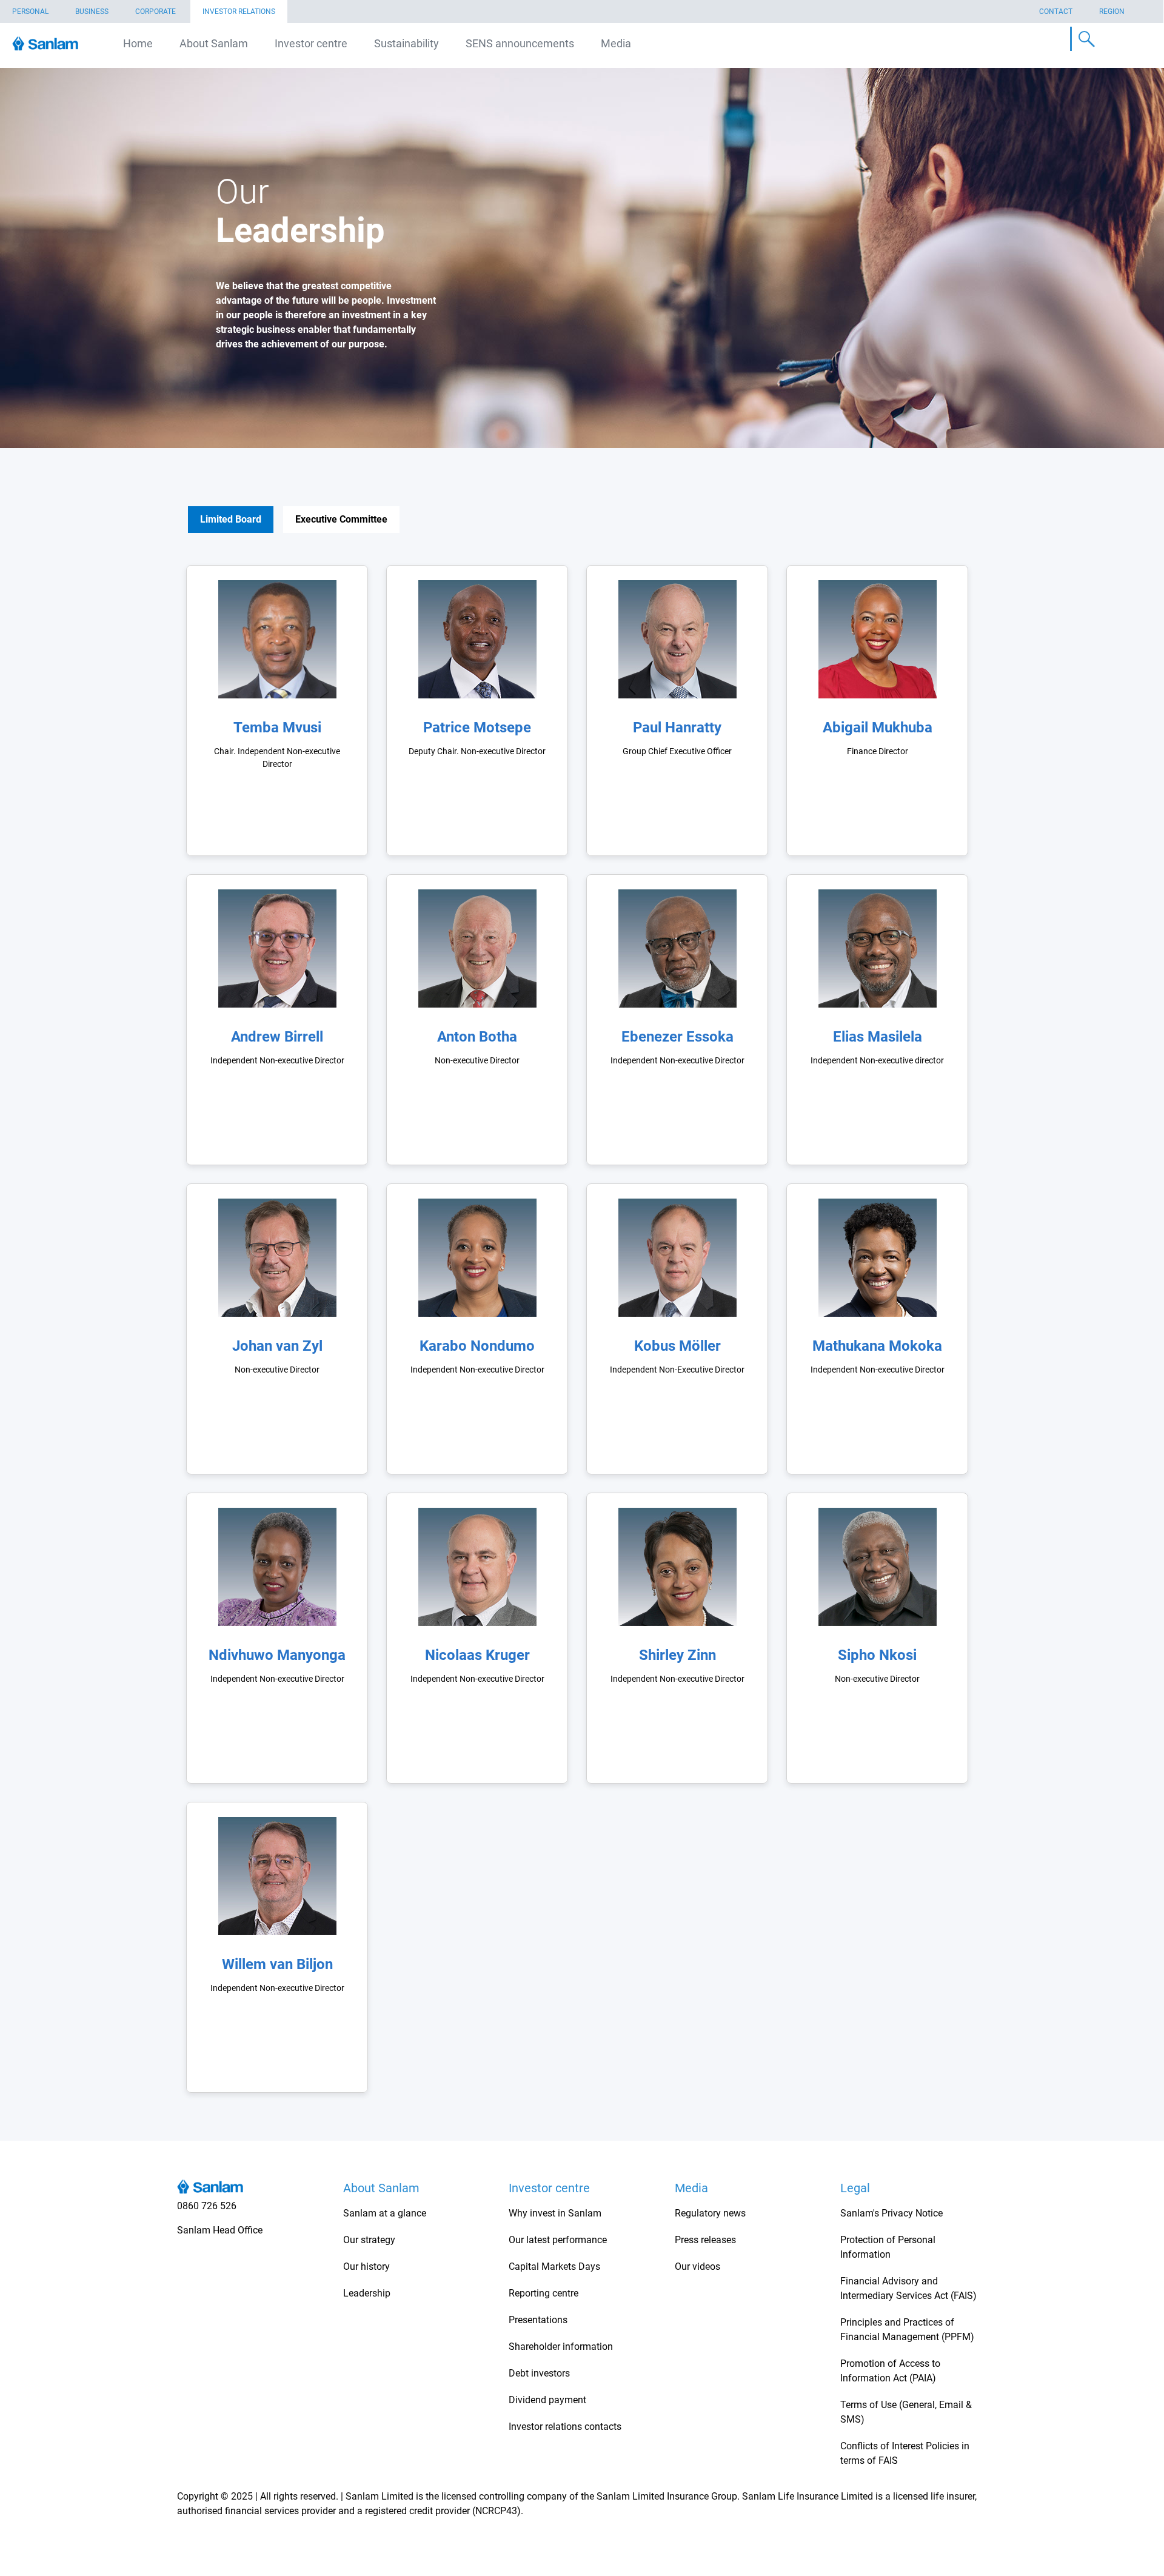

In [114]:
import asyncio
import ipynbname
from playwright.async_api import async_playwright
from IPython.display import Image, display

saved_file = f"./saved_images/{ipynbname.name()}_org_chart_1.png"
link = org_structure_links[0] 
print(f"Taking screenshot of: {link}")

async def run_me():
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        context = await browser.new_context(
            user_agent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36",
            viewport={"width": 1920, "height": 1080}
        )
        page = await context.new_page()

        try:
            #await page.goto(link, wait_until="networkidle", timeout=60000)
            await page.goto(link)
            print(f"Page title: {await page.title()}")
            await page.screenshot(path=saved_file, full_page=True)
        except Exception as e:
            print(f"Error loading page: {e}")
        finally:
            await browser.close()

await run_me()

# Display the image
display(Image(filename=saved_file))


In [115]:
import requests
from bs4 import BeautifulSoup


org_structure_url = org_structure_links[0]

response = requests.get(org_structure_url)
response.raise_for_status()  
soup = BeautifulSoup(response.text, 'html.parser')


In [116]:
md(soup.get_text())





About Us | Leadership | Sanlam


































PERSONAL
BUSINESS
CORPORATE
INVESTOR RELATIONS


CONTACT
REGION





South Africa
South Africa Home
Sanlam Investments
Sanlam Private Wealth
Glacier by Sanlam
Sanlam BlueStar


Rest of Africa
Sanlam Investments East Africa
Sanlam Kenya
Sanlam Mozambique
Sanlam Namibia
Sanlam Private Wealth Mauritius
Sanlam Rwanda
Sanlam Swaziland
Sanlam Tanzania
Sanlam Uganda
Sanlam Zambia


Europe
Sanlam UK
Sanlam Securities UK
Sanlam FOUR
Sanlam Asset Management Ireland


Global
Global Investment Solutions


Investor Relations








Home
About Sanlam

Sanlam at a glance
Our strategy
Our history
Leadership
Sustainability
Sanlam Foundation
Transformation


Investor centre

Why invest in Sanlam
Our latest performance
Capital Markets Days
Reporting centre
Consensus estimates
Shareholder information
Debt investors
ADR holders
Governance
Investor relations contacts


Sustainability

Sustainability
Foundation
Transformation
Governance


SENS announcements
Media

Media releases
Our videos
Podcasts




Contact
Region












About Sanlam
Sanlam is a diversified financial services company headquartered in South Africa, with a strong presence in 31 countries, across the African continent and a presence in Asia.

Sanlam at a glance
Our strategy
Our history
Leadership






The group reported strong operational performance in its 2024 annual results, highlighted by strong earnings growth, robust new business volumes and value of new business.

Read more








Investor centre
Find information about our performance, dividends and investor events.

Why invest in Sanlam
Our latest performance
Capital Markets Days
Reporting centre
Consensus estimates
Shareholder information
Debt investors
Dividend payment
Investor relations contacts






Capital Markets Days
16 October 2025
Read more








About Sustainability
At Sanlam, our dedication to sustainability  stands as a central aspect of our purpose-led strategy. Our efforts remain focused on creating shared value, deepening financial inclusion and the promotion of sustainable investment decisions , environmental wellness and alignment with the SDGs.

Sustainability
Foundation
Transformation
Governance






Sanlam achieves robust operating performance in the first half of 2024
This was based on consistent implementation of the business strategy in the last four years, which centres on enhancing organic growth while complementing this with strategic acquisitions.
Read more








Media
Find the latest media releases, Sanlam news, speeches and award wins.

Media releases
Our videos
Podcasts







Sanlam reports strong growth in 2024
Strong earnings growth, robust new business volumes and excellent investment returns underpin the increase in the Sanlam dividend declaration.
Read more










































Our Leadership
We believe that the greatest competitive advantage of the future will be people. Investment in our people is therefore an investment in a key strategic business enabler that fundamentally drives the achievement of our purpose.






Limited Board
Executive Committee


Limited Board









Temba Mvusi
Chair. Independent Non-executive Director




Chair. Independent Non-executive Director
Nationality: South African
Year of birth: 1955
Director since 2024
Mr Mvusi was appointed Chair of the Board of Sanlam on 1 April 2024.
More about me











Patrice Motsepe
Deputy Chair. Non-executive Director




Deputy Chair. Non-executive Director
Nationality: South African
Year of birth: 1962
Director since 2004.
Dr Motsepe was appointed to the Sanlam Board in 2004.
More about me











Paul Hanratty
Group Chief Executive Officer




Group Chief Executive Officer
Nationality: Irish
Year of birth: 1961
Director since 2017.
Mr Hanratty joined the Sanlam Board of Directors in 2017 as an independent non-executive director and was chair of the Audit Committee and member of the Risk and Compliance as well as the Social, Ethics and Sustainability (SES) Committees.
More about me











Abigail Mukhuba
Finance Director




Finance Director
Nationality: South African
Year of birth: 1979
Director since 2020.
Ms Mukhuba is the Finance Director of Sanlam Group and was appointed to the Board in October 2020.
More about me












Andrew Birrell
Independent Non-executive Director




Independent Non-executive Director
Nationality: British / South African
Year of birth: 1969
Director since 2019.
Mr Birrell was appointed to the Sanlam Board on 01 September 2019.
More about me











Anton Botha
Non-executive Director




Non-executive Director
Nationality: South African
Year of birth: 1953
Director since 2006.
Mr Botha was appointed to the Sanlam Board in 2006.
More about me











Ebenezer Essoka
Independent Non-executive Director




Independent Non-executive Director
Nationality: Cameroonian
Year of birth: 1955
Director since 2021.
Mr Essoka was appointed to the Board in June 2021 as an expert in finance, financial markets, audit, risk, investments, and international business.
More about me











Elias Masilela
Independent Non-executive director




Chair. Independent Non-executive Director
Nationality: South African
Year of birth: 1964
Director since 2019.
Mr Masilela was appointed to the Sanlam Board in October 2019.
More about me












Johan van Zyl
Non-executive Director




Non-executive Director
Nationality: South African
Year of birth: 1956
Director since 2016.
Dr Van Zyl is a non-executive director and was appointed to the Sanlam Board in 2016.
More about me











Karabo Nondumo
Independent Non-executive Director




Independent Non-executive Director
Nationality: South African
Year of birth: 1978
Director since 2015.
Ms Nondumo was appointed to the Sanlam Board in 2015.
More about me











Kobus Möller
Independent Non-Executive Director




Independent Non-Executive Director
Nationality: South African
Year of birth: 1959
Director since 2020.
Mr Möller is an Independent Non-executive Director of Sanlam Limited and Sanlam Life Insurance Limited who has been Chair of the Board’s Audit, Actuarial and Finance Committee since June 2020.
More about me











Mathukana Mokoka
Independent Non-executive Director




Independent Non-executive Director
Nationality: South African
Year of birth: 1974
Director since 2018.
Ms Mokoka was appointed to the Sanlam Board in March 2018.
More about me












Ndivhuwo Manyonga
Independent Non-executive Director




Independent Non-executive Director
Nationality: South African
Year of birth: 1981
Director since 2021.
Ms Manyonga was appointed to the Sanlam Board on 6 December 2021.
More about me











Nicolaas Kruger
Independent Non-executive Director




Independent Non-executive Director
Nationality: South African
Year of birth: 1967
Director since 2020.
Mr Kruger is an Independent Non-executive Director appointed to the Board of Sanlam in May 2020.
More about me











Shirley Zinn
Independent Non-executive Director




Independent Non-executive Director
Nationality: South African
Year of birth: 1961
Director since 2018.
Dr Zinn is an independent non-executive director appointed to the Board in December 2018 as an expert in human resources, ethics and governance.
More about me











Sipho Nkosi
Non-executive Director




Non-executive Director
Nationality: South African
Year of birth: 1954
Director since 2006.
Mr Nkosi has been a member of the Board of Directors since 2006 and was appointed as Lead Independent Director of the Board in December 2016.
More about me













Willem van Biljon
Independent Non-executive Director




Independent Non-executive Director
Nationality: South Africa
Year of birth: 1961
Director since 2021.
Mr Van Biljon was appointed to the Sanlam Board in August 2021.
More about me







Executive Committee









Paul Hanratty
Group Chief Executive Officer




Group Chief Executive Officer
Nationality: Irish
Year of birth: 1961
Director since 2017.
Mr Hanratty joined the Sanlam Board of Directors in 2017 as an independent non-executive director and was chair of the Audit Committee and member of the Risk and Compliance as well as the Social, Ethics and Sustainability (SES) Committees.
More about me











Abigail Mukhuba
Finance Director




Finance Director
Nationality: South African
Year of birth: 1979
Director since 2020.
Ms Mukhuba is the Finance Director of Sanlam Group and was appointed to the Board in October 2020.
More about me











Anton Gildenhuys
Chief Executive Officer: Sanlam Life and Savings




Chief Executive Officer: Sanlam Life and Savings
Nationality: South African
Year of birth: 1974
Age: 50
Mr Gildenhuys was appointed Chief Executive Officer: Sanlam Life and Savings on 1 April 2024.
More about me











Bongani Madikiza
Chief Executive Officer: SA Retail Mass




Chief Executive Officer: SA Retail Mass
Nationality: South African
Year of birth: 1973
Chief Executive Officer since 2020.
Mr Madikiza has been appointed as the Chief Executive Officer: SA Retail Mass on 1 September 2020.  
More about me












Carl Roothman
Chief Executive Officer: Sanlam Investment Group




Chief Executive Officer: Sanlam Investment Group
Age: 52
Mr Roothman was appointed Chief Executive Officer of Sanlam Investment Group on 01 January 2022. 
More about me











Kanyisa Mkhize
Chief Executive Officer: Sanlam Corporate 





Chief Executive Officer: Sanlam Corporate
Nationality: South African
Year of birth: 1984
Chief Executive Officer since 2020.

Kanyisa was appointed as the Chief Executive Officer of Sanlam Corporate in September 2020.  
More about me











Riaan van Dyk
Chief Executive Officer: Sanlam Fintech




Chief Executive Officer: Sanlam Fintech
Nationality: South African
Year of birth: 1966
Mr van Dyk is the Chief Executive Officer of Sanlam Fintech and was appointed to the position on 1 February 2023.
More about me











Tavaziva Madzinga
Chief Executive Officer: Santam Limited




Chief Executive Officer: SantamAge: 46
Tavaziva is currently Santam Executive Director from 1 April 2022 and Santam CEO effective from 1 July 2022.
More about me













Mlondolozi Mahlangeni
Chief Risk Officer: Chief Actuary




Chief Risk Officer: Chief Actuary
Nationality: South African
Year of birth: 1980
Chief Risk Officer and Chief Actuary since 2020.
Mr Mahlangeni has been appointed as the Chief Risk Officer and Chief Actuary on 14 September 2020. 
More about me











Sana-Ullah Bray 
Group Executive: Human Capital




Group Executive: Human Capital
Nationality: South African
Year of birth: 1974
Sana-Ullah is the Group Executive: Human Capital of the Sanlam Group and was appointed on 01 January 2023.
More about me











Shadi Chauke
Group Executive: Corporate Affairs and Sustainability




Group Executive: Corporate Affairs and Sustainability 
Nationality: South African
Year of birth: 1979
Mrs Chauke is the Group Executive: Corporate Affairs and Sustainability and was appointed on 1 November 2024.
More about me











Theo Mabaso
Group Chief Information Officer: Group Exco




Group Chief Information Officer: Group Exco
Nationality: South African
Year of birth: 1976
Mr Mabaso is the Group Chief Information Officer and was appointed as a member of Group Exco on 1 January 2022. 
More about me



















0860 726 526
Sanlam Head Office


About Sanlam

Sanlam at a glance
Our strategy
Our history
Leadership




Investor centre

Why invest in Sanlam
Our latest performance
Capital Markets Days
Reporting centre
Presentations
Shareholder information
Debt investors
Dividend payment

Investor relations contacts



Media

Regulatory news
Press releases
Our videos



Legal

Sanlam's Privacy Notice
Protection of Personal Information
Financial Advisory and Intermediary Services Act (FAIS)
Principles and Practices of Financial Management (PPFM)
Promotion of Access to Information Act (PAIA)
Terms of Use (General, Email & SMS)
Conflicts of Interest Policies in terms of FAIS




Copyright © 2025 | All rights reserved. | Sanlam Limited is the licensed controlling company of the Sanlam Limited Insurance Group. Sanlam Life Insurance Limited is a licensed life insurer, authorised financial services provider and a registered credit provider (NCRCP43).







In [117]:
soup.encode()

b'<!DOCTYPE html>\n\n<html>\n<head>\n<meta charset="utf-8"/>\n<title>About Us | Leadership | Sanlam</title>\n<meta charset="utf-8">\n<!-- prevent skype styles on telephone numbers -->\n<meta content="telephone=no" name="format-detection"/>\n<meta content="SKYPE_TOOLBAR_PARSER_COMPATIBLE" name="SKYPE_TOOLBAR">\n<meta content="yes" name="apple-mobile-web-app-capable"/>\n<link href="images/favicon.ico" rel="shortcut icon" type="image/x-icon"/>\n<meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0" name="viewport"/>\n<meta content="Sanlam" name="author"/>\n<meta content="index, follow" name="robots"/>\n<link href="https://use.typekit.net/npe3dbj.css" rel="stylesheet"/>\n<link href="css/normalize.css" rel="stylesheet">\n<link href="css/font-awesome.min.css" rel="stylesheet"/>\n<link href="css/fonts.css" rel="stylesheet"/>\n<link href="css/global.css" rel="stylesheet"/>\n<link href="css/desktop.css" media="only screen and (min-width: 1220px)" rel="stylesheet"/>\n<link href

In [118]:
import dspy 
lm = dspy.LM('gpt-4.1', temperature=0.8, model_type='chat', cache=False, api_key=settings.OPENAI_API_KEY)
dspy.configure(lm=lm)

In [119]:
query = f'''
You are an expert in deciphering if a web page shows a company's leadership or org structure. 
Does the following content look like a page that is {company_name}'s, that was extracted from url {org_structure_url}? 
{soup.get_text()} 
'''

response = lm(query)[0]
md(response)

Yes, **this content is highly indicative of a leadership or organisational structure page for Sanlam**, and it is very likely from the official Sanlam website (https://www.sanlam.com/leadership.php). Here’s why:

### Key Evidence

#### 1. **Section Headings and Structure**
- The content is titled with navigation links such as “About Us | Leadership | Sanlam,” setting the context for a leadership or governance page.
- There are clear subsections named **“Limited Board”** and **“Executive Committee”** — classic terminology for a company’s leadership breakdown.

#### 2. **Detailed Profiles**
- Individual **names, titles, roles, nationalities, years of birth, appointment years, and brief biographies** are provided for numerous board members and executives.
- Roles such as “Chair. Independent Non-executive Director,” “Finance Director,” and “Chief Executive Officer: Sanlam Life and Savings” are listed, which are typical for a leadership or org structure page.

#### 3. **Organisational Clarity**
- Board and Executive Committee members are clearly separated, aligning with best practices for corporate governance disclosures.
- Each leader/executive is presented with a structured, short bio—characteristic of leadership profile pages on major company websites.

#### 4. **Supporting Corporate Information**
- There is accompanying information about the business, regions, sustainability, investor relations, and compliance, which is standard on a corporate leadership page.
- The footer contains legal and copyright notices referencing Sanlam Limited and its group structure.

#### 5. **Direct References to Sanlam**
- The Sanlam name is repeatedly mentioned, including explicit references such as “Sanlam is a diversified financial services company headquartered in South Africa…”
- The leadership roles reference Sanlam-specific business units (e.g., “Sanlam Life and Savings,” “Sanlam Fintech,” “Sanlam Investment Group”).

#### 6. **Navigation and Contact Information**
- The navigation structure matches what is expected of a large corporation's leadership page (investor centre, sustainability, media, contact).

---

### **Conclusion**
**This is unmistakably a leadership/organisational structure page for Sanlam.**  
It provides comprehensive information on the company's board of directors and executive committee, including their roles, backgrounds, and tenures—matching industry norms for such pages.

**So, yes, the content very much looks like it is from Sanlam’s leadership page.**

In [120]:
query = f'''
Extract the leadership team structure from the following text, and present it in a markdown table with columns "Name", "Title", 
"Reports To" (if available), and "Bio" (if available). 
If the information is not available, leave the cell blank. Text: 
{soup.get_text()}

Include urls to other links that seem relevant to an individual's profile, if available.

''' 
# print(query)
# {soup.get_text()}
# {soup.encode()}   # Uses html

In [121]:
response = lm(query)[0]
md(response)

Here is the extracted **Sanlam leadership team structure** in a markdown table, with available details listed for each member. Links to "More about me" are not explicitly provided in the text, so those are omitted.

---

### Limited Board

| Name                | Title                                       | Reports To | Bio |
|---------------------|---------------------------------------------|------------|-----|
| Temba Mvusi         | Chair. Independent Non-executive Director   |            | Nationality: South African; Year of birth: 1955; Director since 2024. Mr Mvusi was appointed Chair of the Board of Sanlam on 1 April 2024. |
| Patrice Motsepe     | Deputy Chair. Non-executive Director        |            | Nationality: South African; Year of birth: 1962; Director since 2004. Dr Motsepe was appointed to the Sanlam Board in 2004. |
| Paul Hanratty       | Group Chief Executive Officer               |            | Nationality: Irish; Year of birth: 1961; Director since 2017. Joined Board as independent non-executive director and was chair of the Audit Committee and member of the Risk and Compliance as well as SES Committees. |
| Abigail Mukhuba     | Finance Director                            |            | Nationality: South African; Year of birth: 1979; Director since 2020. Appointed to the Board in October 2020. |
| Andrew Birrell      | Independent Non-executive Director          |            | Nationality: British / South African; Year of birth: 1969; Director since 2019. Appointed to the Sanlam Board on 01 September 2019. |
| Anton Botha         | Non-executive Director                      |            | Nationality: South African; Year of birth: 1953; Director since 2006. Appointed to the Sanlam Board in 2006. |
| Ebenezer Essoka     | Independent Non-executive Director          |            | Nationality: Cameroonian; Year of birth: 1955; Director since 2021. Appointed as an expert in finance, financial markets, audit, risk, investments, and international business. |
| Elias Masilela      | Independent Non-executive Director          |            | Nationality: South African; Year of birth: 1964; Director since 2019. Appointed to the Sanlam Board in October 2019. |
| Johan van Zyl       | Non-executive Director                      |            | Nationality: South African; Year of birth: 1956; Director since 2016. Appointed to the Sanlam Board in 2016. |
| Karabo Nondumo      | Independent Non-executive Director          |            | Nationality: South African; Year of birth: 1978; Director since 2015. Appointed to the Sanlam Board in 2015. |
| Kobus Möller        | Independent Non-Executive Director          |            | Nationality: South African; Year of birth: 1959; Director since 2020. Chair of the Board’s Audit, Actuarial and Finance Committee since June 2020. |
| Mathukana Mokoka    | Independent Non-executive Director          |            | Nationality: South African; Year of birth: 1974; Director since 2018. Appointed March 2018. |
| Ndivhuwo Manyonga   | Independent Non-executive Director          |            | Nationality: South African; Year of birth: 1981; Director since 2021. Appointed 6 December 2021. |
| Nicolaas Kruger     | Independent Non-executive Director          |            | Nationality: South African; Year of birth: 1967; Director since 2020. Appointed May 2020. |
| Shirley Zinn        | Independent Non-executive Director          |            | Nationality: South African; Year of birth: 1961; Director since 2018. Appointed December 2018 as an expert in human resources, ethics and governance. |
| Sipho Nkosi         | Non-executive Director                      |            | Nationality: South African; Year of birth: 1954; Director since 2006. Lead Independent Director since December 2016. |
| Willem van Biljon   | Independent Non-executive Director          |            | Nationality: South African; Year of birth: 1961; Director since 2021. Appointed August 2021. |

---

### Executive Committee

| Name                | Title                                                     | Reports To         | Bio |
|---------------------|-----------------------------------------------------------|--------------------|-----|
| Paul Hanratty       | Group Chief Executive Officer                             | Board              | Nationality: Irish; Year of birth: 1961; Director since 2017. Joined Board as independent non-executive director and was chair of Audit and member of Risk, Compliance, SES Committees. |
| Abigail Mukhuba     | Finance Director                                          | Group CEO          | Nationality: South African; Year of birth: 1979; Director since 2020. Appointed October 2020. |
| Anton Gildenhuys    | CEO: Sanlam Life and Savings                              | Group CEO          | Nationality: South African; Year of birth: 1974; Age: 50. Appointed 1 April 2024. |
| Bongani Madikiza    | CEO: SA Retail Mass                                       | Group CEO          | Nationality: South African; Year of birth: 1973. CEO since 2020, appointed 1 September 2020. |
| Carl Roothman       | CEO: Sanlam Investment Group                              | Group CEO          | Age: 52. Appointed 1 January 2022. |
| Kanyisa Mkhize      | CEO: Sanlam Corporate                                     | Group CEO          | Nationality: South African; Year of birth: 1984. CEO since 2020, appointed September 2020. |
| Riaan van Dyk       | CEO: Sanlam Fintech                                       | Group CEO          | Nationality: South African; Year of birth: 1966. Appointed 1 February 2023. |
| Tavaziva Madzinga   | CEO: Santam Limited                                       | Group CEO/Board    | Age: 46. Santam Executive Director from 1 April 2022; CEO effective 1 July 2022. |
| Mlondolozi Mahlangeni| Chief Risk Officer: Chief Actuary                        | Group CEO          | Nationality: South African; Year of birth: 1980. Chief Risk Officer and Chief Actuary since 2020, appointed 14 September 2020. |
| Sana-Ullah Bray     | Group Executive: Human Capital                            | Group CEO          | Nationality: South African; Year of birth: 1974. Appointed 1 January 2023. |
| Shadi Chauke        | Group Executive: Corporate Affairs and Sustainability      | Group CEO          | Nationality: South African; Year of birth: 1979. Appointed 1 November 2024. |
| Theo Mabaso         | Group Chief Information Officer: Group Exco               | Group CEO          | Nationality: South African; Year of birth: 1976. Member of Group Exco, appointed 1 January 2022. |

---

**Note:**
- "Reports To" is inferred where possible (typically to Group CEO or Board for top executives).
- Bios are summarized from the information given, including nationality, birth year, and appointment dates.
- Only the information present in your text is included; please refer to the [Sanlam Leadership Page](https://www.sanlam.com/about/leadership) for detailed profiles, if available. (No direct profile links were provided in the supplied text.)

In [122]:
print(response)

Here is the extracted **Sanlam leadership team structure** in a markdown table, with available details listed for each member. Links to "More about me" are not explicitly provided in the text, so those are omitted.

---

### Limited Board

| Name                | Title                                       | Reports To | Bio |
|---------------------|---------------------------------------------|------------|-----|
| Temba Mvusi         | Chair. Independent Non-executive Director   |            | Nationality: South African; Year of birth: 1955; Director since 2024. Mr Mvusi was appointed Chair of the Board of Sanlam on 1 April 2024. |
| Patrice Motsepe     | Deputy Chair. Non-executive Director        |            | Nationality: South African; Year of birth: 1962; Director since 2004. Dr Motsepe was appointed to the Sanlam Board in 2004. |
| Paul Hanratty       | Group Chief Executive Officer               |            | Nationality: Irish; Year of birth: 1961; Director since 2017. Join